In [1]:
from math import sqrt

import torch
import numpy as np
from matplotlib import pyplot as plt

import metrics

In [2]:

def get_graph(regularization, dimension):
    width, height = dimension, dimension
    image_one = np.random.rand(width, height)
    image_two = np.random.rand(width, height)
    image_one /= np.sum(image_one)
    image_two /= np.sum(image_two)
    image_one = torch.tensor(image_one, dtype=torch.float32)
    image_two = torch.tensor(image_two, dtype=torch.float32)
    image_one, image_two = image_one.reshape(width * height), image_two.reshape(width * height)

    cost_matrix = torch.tensor(
            [
                [
                    sqrt((i // width - j // width) ** 2 + (i % width - j % width) ** 2) 
                    for j in range(width * height)
                ]
                for i in range(width * height)
            ]
        )

    wasserstein = metrics.WassersteinApproximation(regularization=regularization)
    return wasserstein.compute_vectors_distance(image_one, image_two, cost_matrix, True)

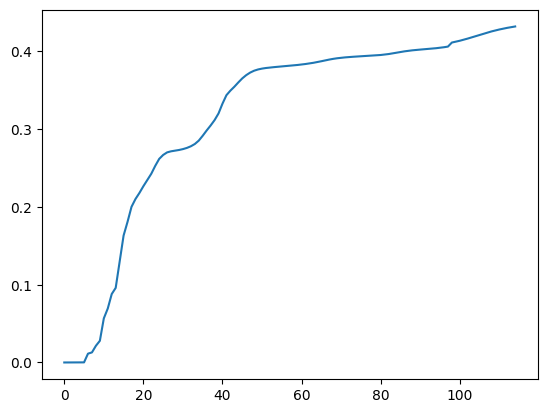

In [9]:
plt.plot(get_graph(50, 10))
plt.show()